# Intro



Nama: `Muhammad Iqbal Saputra`

NIM: `2702390236`

## Latar belakang data

Kapal Titanic berlayar dari Southampton, Inggris menuju New York, Amerika Serikat. Perjalanan ini merupakan pelayaran perdana kapal Titanic.

  Rute kapal Titanic
Berangkat dari Southampton pada 10 April 1912

Berhenti di Cherbourg, Prancis

Berhenti di Queenstown (sekarang Cobh), Irlandia

Berlayar ke Samudra Atlantik menuju New York

Tenggelam di Samudra Atlantik Utara pada 15 April 1912


  Penyebab tenggelam
Kapal Titanic tenggelam setelah menabrak gunung es. Kecelakaan ini menewaskan sekitar 1.500 orang, termasuk sejumlah orang terkaya di dunia dan lebih dari seribu imigran.

  Bangkai kapal Titanic
Bangkai kapal Titanic masih ada di dasar laut, perlahan hancur di kedalaman 12.415 kaki (3.784 m). Pemerintah Amerika Serikat dan Inggris sepakat menjadikan bangkai Titanic sebagai situs memorial sehingga harus dipelihara dan dibiarkan alias tidak diangkat.

# 1. Import data & libraries

In [255]:
%pip install feature_engine

In [256]:
# library u/ mengolah dan visualisasi data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# library u/ klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from feature_engine.outliers import Winsorizer

# library u/ preprocessing dan training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# library u/ evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


In [257]:
# load dataset

df_ori = pd.read_csv('https://raw.githubusercontent.com/iqbal-saputra/BINUS/refs/heads/main/Dataset/titanic.csv')
df = df_ori.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [258]:
# cek missing val
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### deskripsi kolom dataset

| **kolom** | **tipe data** | **deskripsi**                                 |
|----------------|--------------|-------------------------------------------------|
| `PassengerId`  | int      | unique ID setiap penumpang  |
| `Survived`     | int      | keselamatan penumpang: `0` = tidak selamat, `1` = selamat. |
| `Pclass`       | int      | kelas tiket penumpang: `1` = Kelas Satu, `2` = Kelas Dua, `3` = Kelas Tiga. |
| `Name`         | str       | nama lengkap penumpang    |
| `Sex`          | str       | jenis kelamin |
| `Age`          | float        | usia penumpang |
| `SibSp`        | int      | jumlah saudara kandung atau pasangan |
| `Parch`        | int      | jumlah orang tua atau anak yang ikut bersama |
| `Ticket`       | str       | nomor tiket penumpang                          |
| `Fare`         | float        | harga tiket               |
| `Embarked`     | str       | pelabuhan naik: `C` = Cherbourg, `Q` = Queenstown, `S` = Southampton. |


untuk kolom `Age`,`Cabin` dan `Embarked` memiliki missing val

In [259]:
# cek informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [260]:
# cek jumlah kolom dan data pada dataframe
df.shape

(891, 12)

In [261]:
# cek persentase missing value pada kolom kabin
missing_percentage = (df['Cabin'].isnull().sum() / len(df)) * 100
print(missing_percentage)

77.10437710437711


persentase missing value pada kolom `Cabin` adalah 77%, yang berarti data pada kolom `Cabin` tidak dapat digunakan


In [262]:
# drop kolom kabin
df.drop(columns=['Cabin'], inplace=True)


In [263]:
# cek
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 2. Exploratory Data Analysis (EDA)

## Stats Descriptive

In [264]:
# statistik deksriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### insight singkat statistik deskriptif

| kategori      | kolom    | insight                                                                |
|---------------|---------|-------------------------------------------------------------------------|
| utama         | Survived | 38.4% penumpang selamat, sisanya 61.6% tidak                   |
|               | Pclass   | mayoritas di kelas 3 (mean = 2.31), range 1 hingga 3                 |
|               | Age      | rata2 usia 29.7 tahun, dan terdapat missing value |
| keluarga      | SibSp    | rata2 0.52 saudara/pasangan, maksimum 8. berarti banyak yg berpergian sendiri                           |
|               | Parch    | rata2 0.38 orang tua/anak, maksimum 6. ada family trip                              |
| ekonomi       | Fare     | rata2 £32.20, 75% membayar di bawah £31, outlier hingga £512       |
| temuan penting| Age      | banyak missing value, perlu di handle                                       |
|               | Fare     | terdapat outlier, termasuk pada kolom `SibSp` dan `Parch`                 |

---


In [265]:
# cek info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


 berhubung terdapat missing value pada kolom `Age` dan kolom `Embarked` maka akan kita handle terlebih dahulu. untuk kolom `Age` dikarnakan cukup banyak missing value maka saya memutuskan untuk mengisi dengan nilai median. dan untuk kolom `Embarked` berhubung hanya 2 kolom yang missing value maka saya memutuskan untuk mengisi dengan value random

In [266]:
# isi value pada kolom `Age` dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-266-7e8c14823390>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [267]:
# cek missing values kolom `Age`
df['Age'].isnull().sum()

0

In [268]:
# cek versi pandas
pd.__version__

'2.2.2'

In [269]:
embarked = df['Embarked'].value_counts()
embarked

,count
Embarked,
S,644
C,168
Q,77


In [270]:
# mengambil value di kolom Embarked
embarked_values = df['Embarked'].dropna().unique()
embarked_values

array(['S', 'C', 'Q'], dtype=object)

In [271]:
# crosscheck missing value
df['Embarked'].isnull().sum()

2

In [272]:
# mengisi missing value di kolom `Embarked` dengan value random dari embarked_values
df['Embarked'] = df['Embarked'].apply(lambda x: random.choice(embarked_values) if pd.isnull(x) else x)

In [273]:
# crosscheck missing value pada kolom `Embarked`
df['Embarked'].isnull().sum()

0

In [274]:
# crosscheck dataframe keseluruhan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


dataframe sudah tidak terdapat missing value, dapat kita olah lebih lanjut

In [275]:
# grouping kolom numerik
numerical_cols = df.select_dtypes(include=['int64','float']).columns
print(numerical_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


## Visualizing Distribution

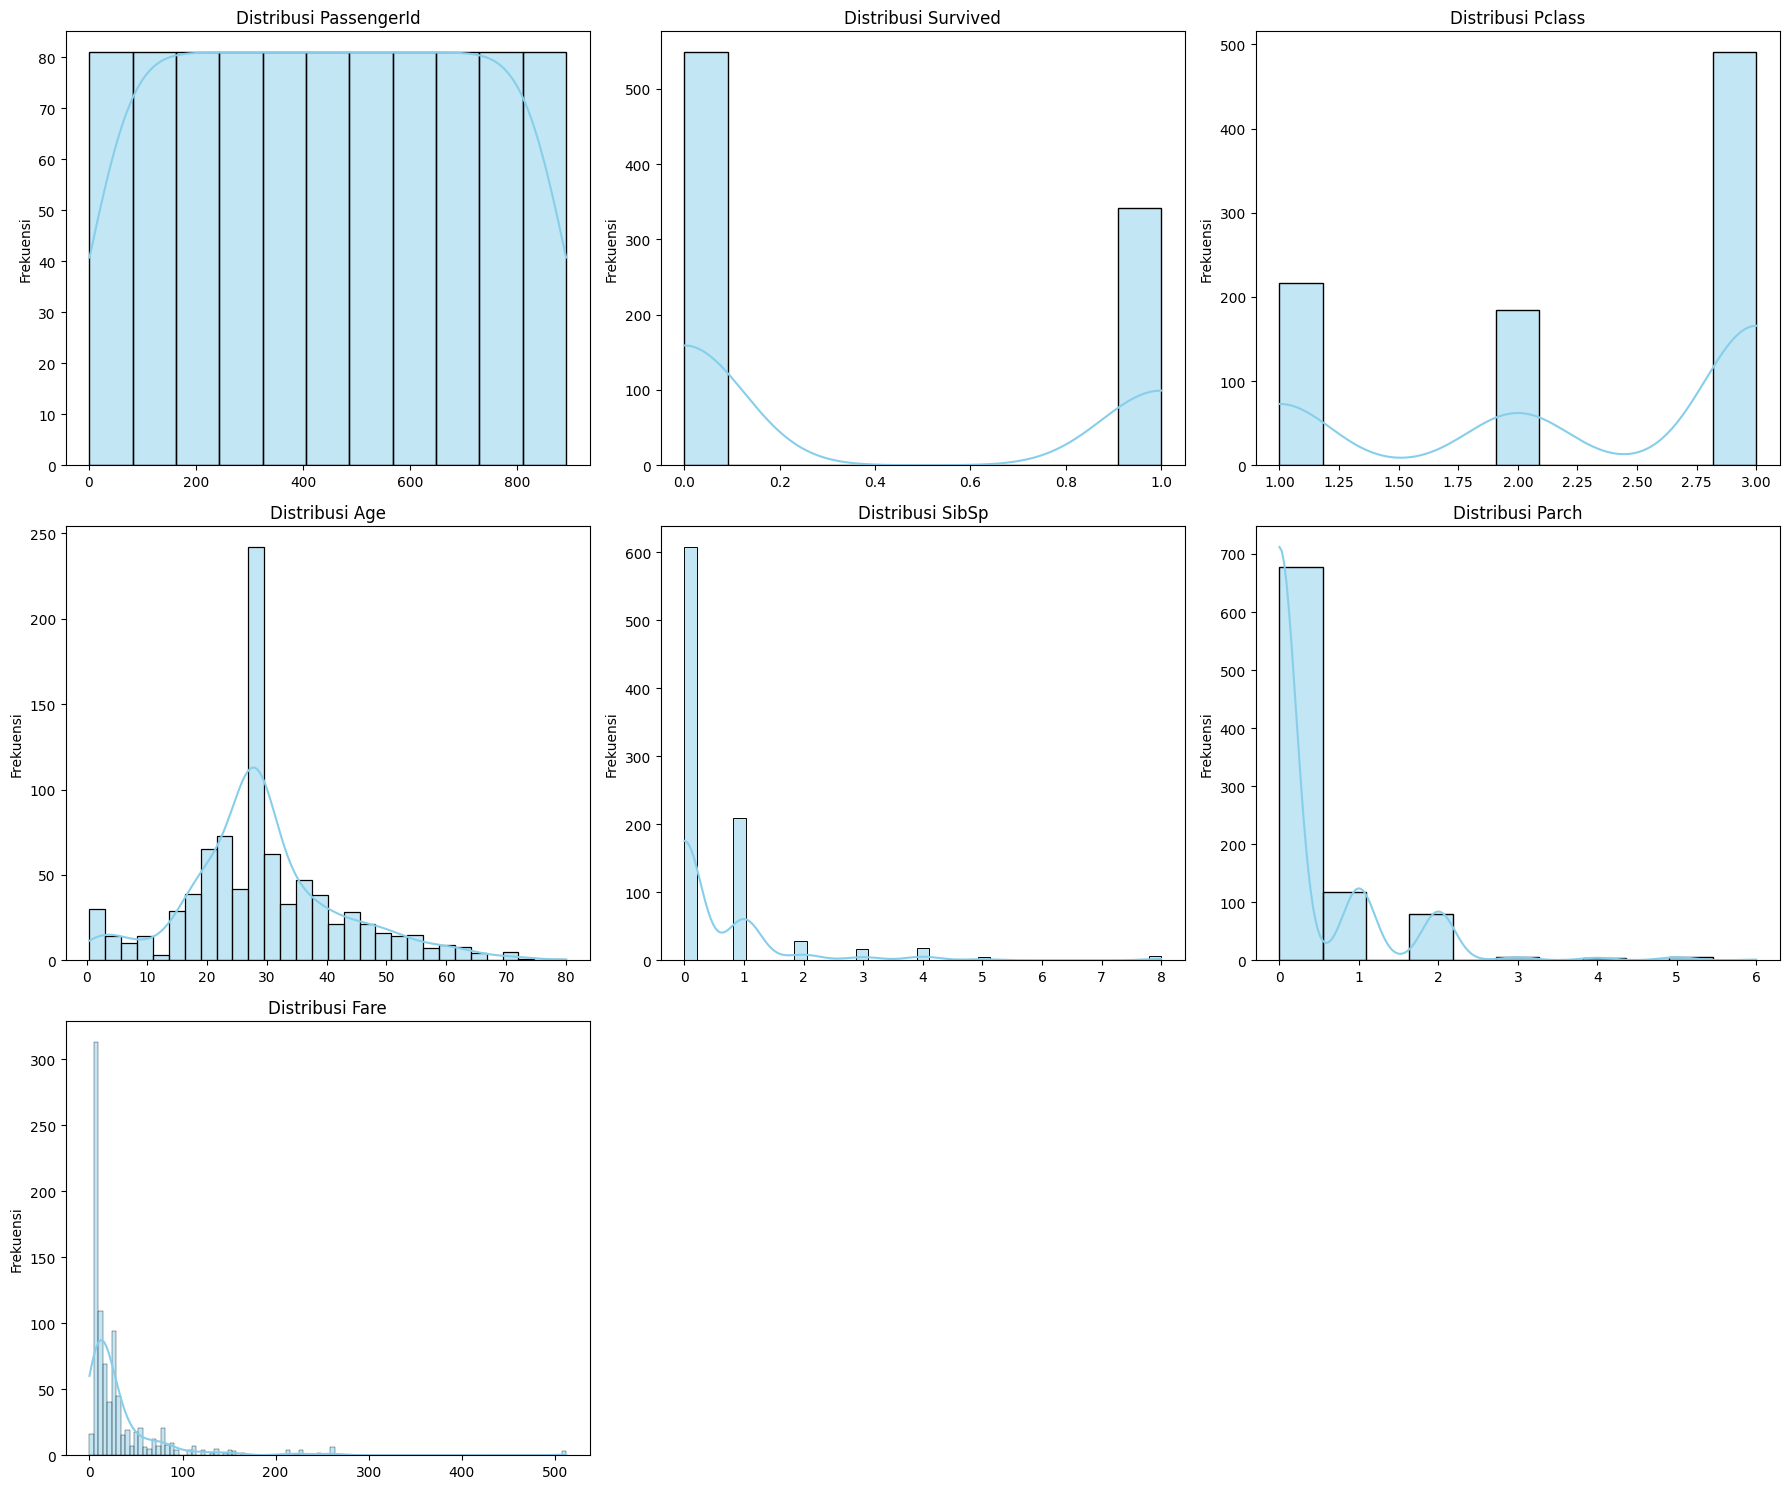

In [276]:
# plot visualisasi distribusi kolom numerik
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 3) + 1, 3, i)  # Grid 3 kolom
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


dikarnakan kolom `PassengerId` tidak begitu berguna ketika modelling/training, maka kita akan drop column `PassengerId`, dan melakukan visualisasi ulang untuk kolom2 numerik

In [277]:
# grouping kolom numerik
numerical_cols = ['Age','Fare']
print(numerical_cols)

['Age', 'Fare']


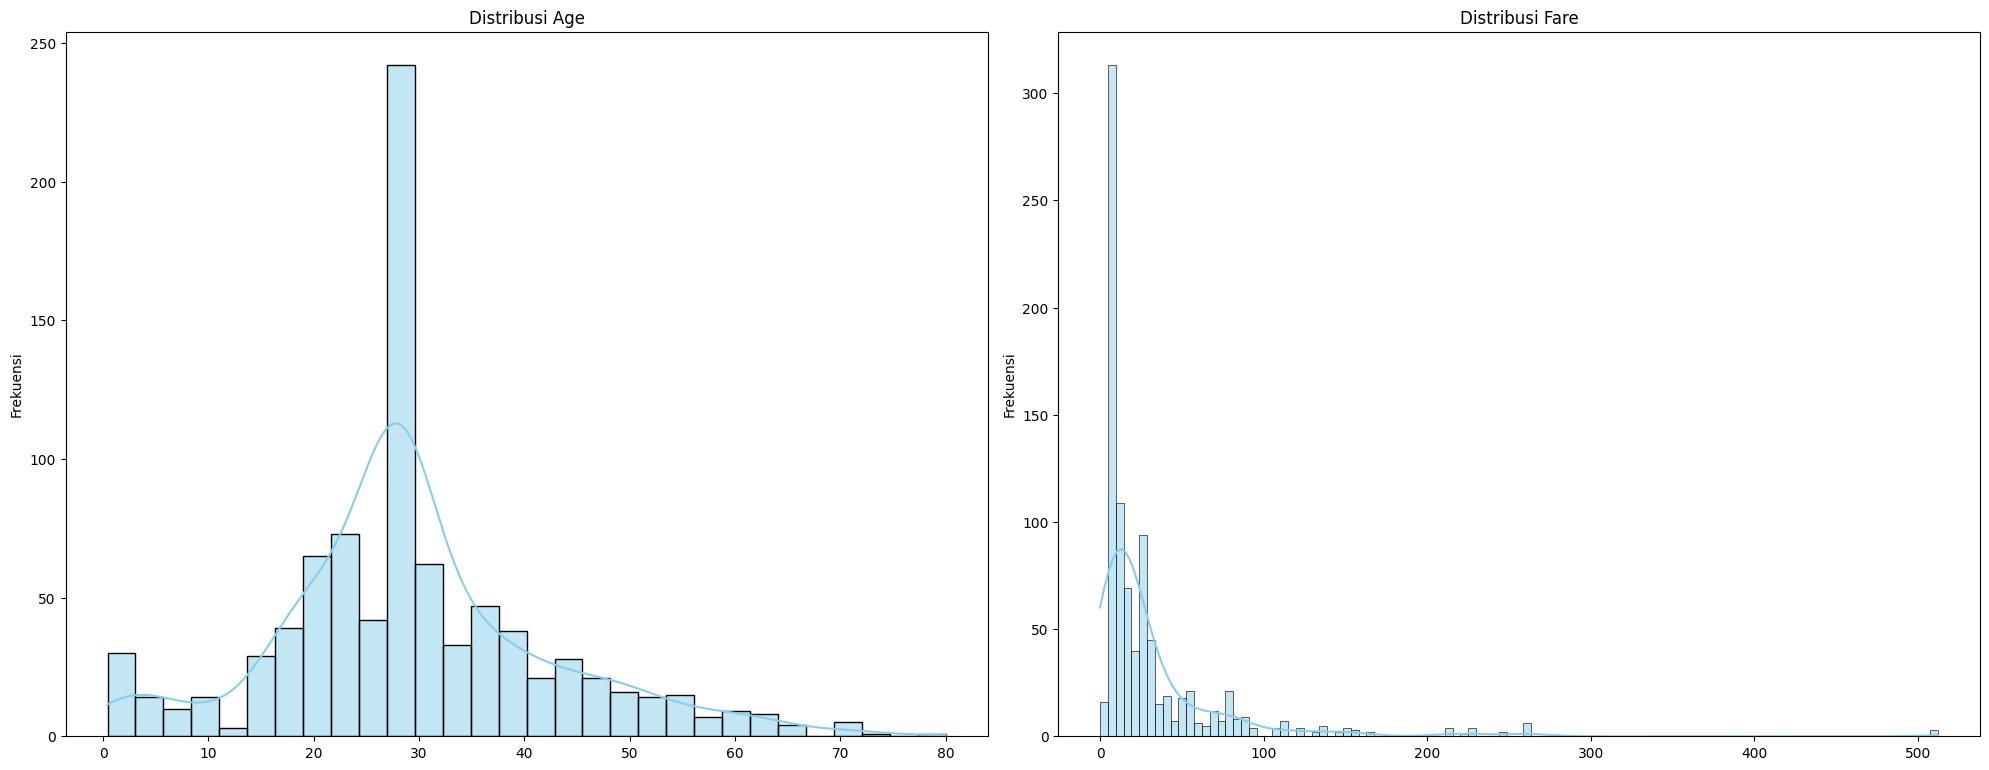

In [278]:
# plot visualisasi distribusi kolom numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 2) + 1,2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


In [279]:
# drop kolom `PassengerId`
df.drop(columns='PassengerId', inplace=True)

In [280]:
# grouping kolom numerik
piechart_cols = ['Parch','SibSp','Pclass']
piechart_cols

['Parch', 'SibSp', 'Pclass']

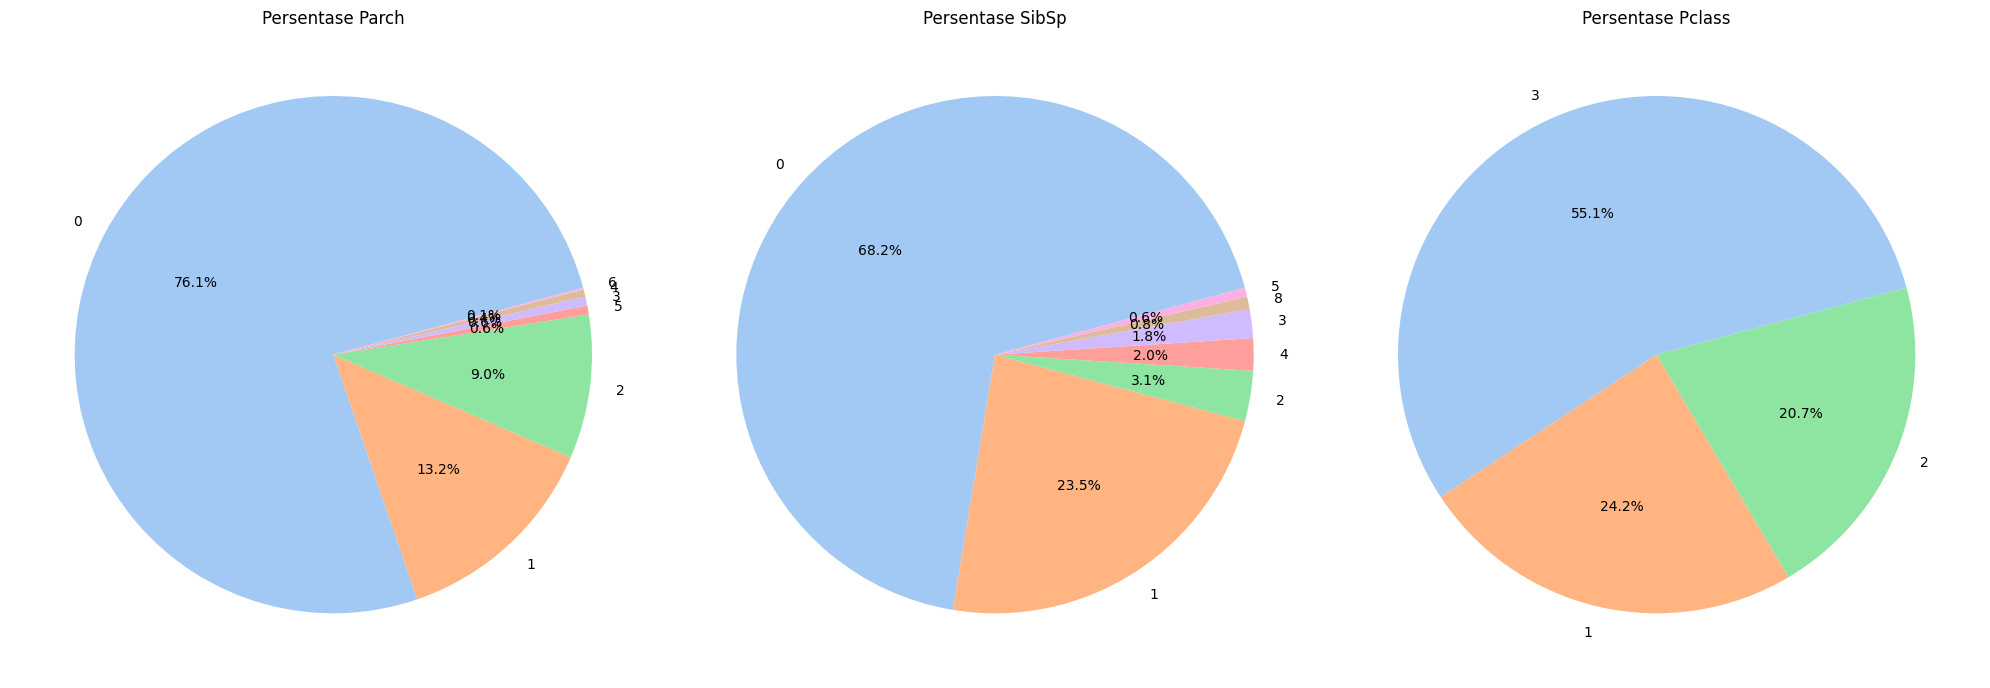

In [281]:
# visualisasi pie chart
plt.figure(figsize=(20,15))

for i, col in enumerate(piechart_cols, 1):
  plt.subplot(1,3,i)
  df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=15, colors=sns.color_palette('pastel'))
  plt.title(f'Persentase {col}')
  plt.ylabel('')

plt.tight_layout()
plt.show()

penumpang mayoritas berpergian sendiri dan mayoritas memesan tiket class `3`, namun ada sebagian kecil yang berpergian bersama saudara atau keluarga besar

<ipython-input-282-ecbc0be8a907>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


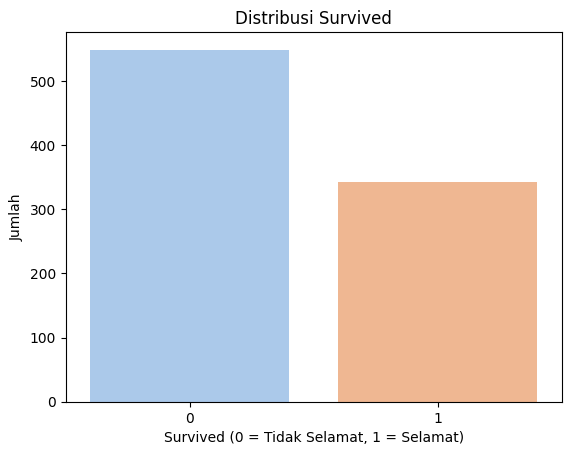

In [282]:
# visualisasi fitur target
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Distribusi Survived')
plt.xlabel('Survived (0 = Tidak Selamat, 1 = Selamat)')
plt.ylabel('Jumlah')
plt.show()


penumpang lebih banyak yang tidak selamat, dan berhubung model yang akan kita buat adalah model untuk prediksi penumpang selamat atau tidak. maka data dapat dikatakan imbalance, perlu dihandle lebih lanjut

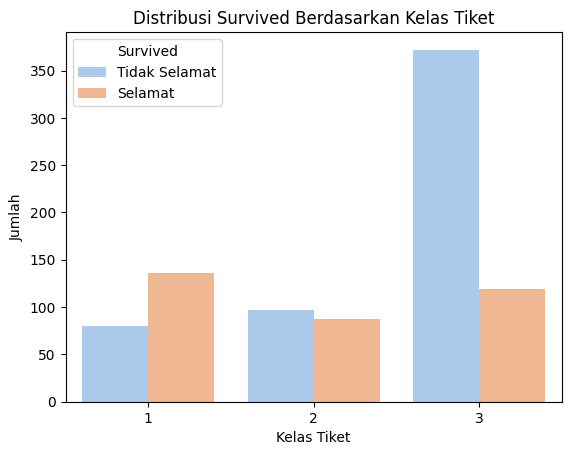

In [283]:
# visualisasi fitur target berdasarkan `PClass`
sns.countplot(x='Pclass', hue='Survived', data=df, palette='pastel')
plt.title('Distribusi Survived Berdasarkan Kelas Tiket')
plt.xlabel('Kelas Tiket')
plt.ylabel('Jumlah')
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])
plt.show()


persentase penumpang `class 1` lebih banyak yang selamat dibanding penumpang `class 3`. ini menunjukan adanya korelasi antara `Pclass` dgn kolom `Survived`


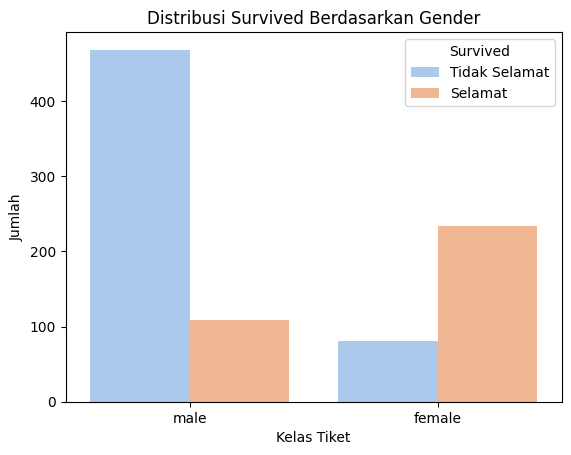

In [284]:
# visualisasi fitur y berdasarkan `Sex`
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Distribusi Survived Berdasarkan Gender')
plt.xlabel('Kelas Tiket')
plt.ylabel('Jumlah')
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])
plt.show()


suprisingly, wanita lebih banyak yg selamat

In [285]:
# encoding manual untuk melihat korelasi di heatmap
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

## Heat Map

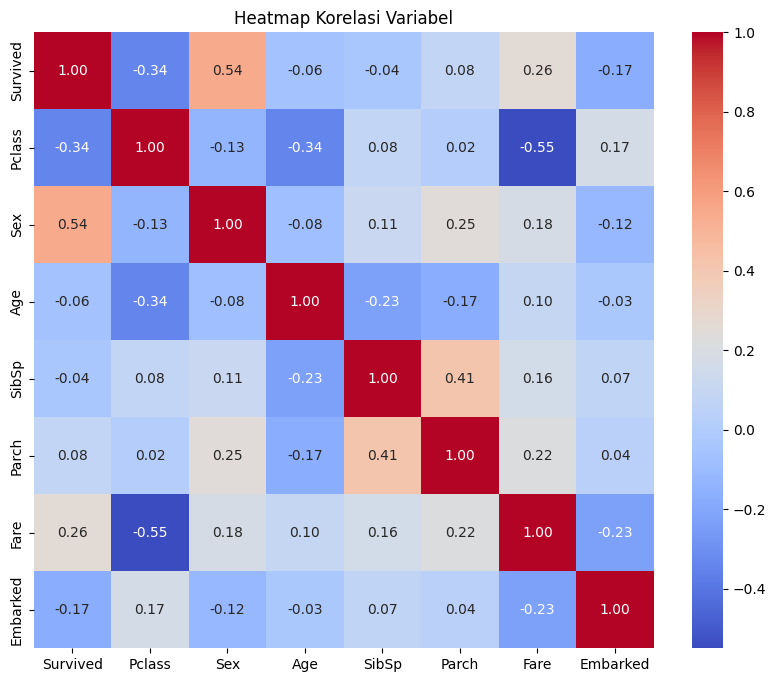

In [286]:
# visualisasi heatmap u/ melihat korelasi antar variabel/fitur
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel')
plt.show()

1. Korelasi dengan `Survived` (Target)

`Sex vs Survived (+0.54)`: gender memiliki korelasi positif yg lumayan kuat dengan keselamatan. ini berarti penumpang wanita lebih selamat dibandingkan pria

`Fare (+0.26)`:korelasi positif lemah. penumpang dengan tarif tiket yang lebih tinggi cenderung lebih selamat

`Pclass (-0.34)`: korelasi negatif sedang. semkain rendah kelas (Pclass 1), peluang selamat lebih tinggi

`Age (-0.06)`: korelasi sangat lemah, artinya usia tidak berhubungan signifikan dengan keselamatan.

`SibSp (-0.04) & Parch (+0.08)`: Hubungan dengan jumlah keluarga di kapal hampir tidak ada.

**Insight**:

penumpang kelas 1 yang membayar tiket lebih mahal memiliki peluang selamat yang lebih tinggi.

---

2. Korelasi Antar Fitur

`Pclass vs Fare (-0.55)`: korelasi negatif kuat. penumpang di kelas lebih rendah (kelas 3) membayar tarif lebih murah.

`SibSp vs Parch (+0.41)`: korelasi sedang. jika seseorang bepergian dengan sodara/pacar, kemungkinan besar mereka juga bepergian dengan orang tua/anak

`Age vs Pclass (-0.34)`: penumpang di kelas yang lebih tinggi (Pclass 1) cenderung lebih tua

**Insight**:

 kelas tiket sangat berhubungan dengan tarif tiket, dan penumpang yang bepergian dengan keluarga cenderung membawa lebih dari satu anggota keluarga

---
**Kesimpulan:**

`Faktor penting`: tarif tiket `Fare`, kelas tiket `Pclass`, dan gender `Sex` menjadi variabel yang penting karna berkorelasi dengan keselamatan cukup kuat

`Hubungan keluarga`: `SibSp` dan `Parch` saling berkorelasi, menunjukkan pola perjalanan bersama keluarga.

`Kelas tiket`-> mempengaruhi harga tiket dan secara tidak langsung mempengaruhi peluang selamat

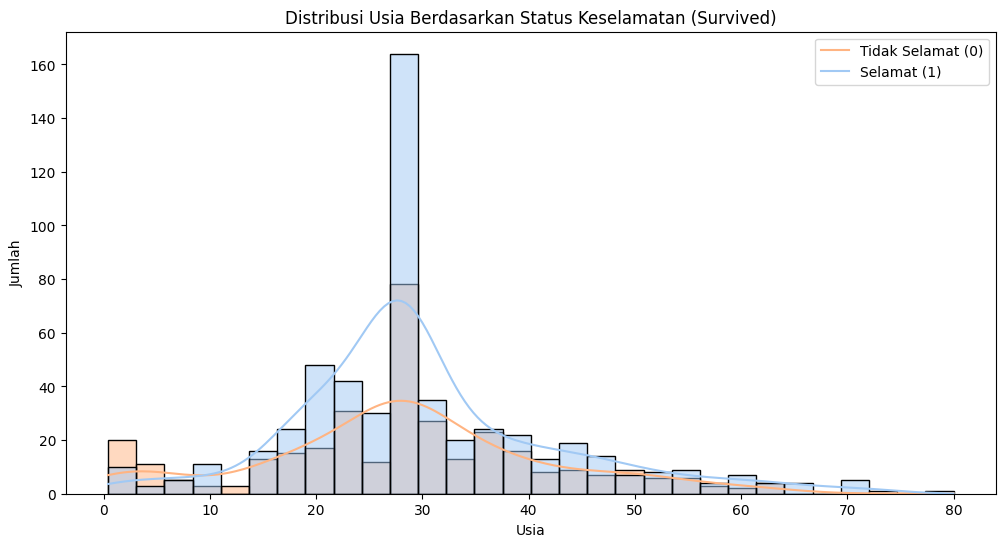

In [287]:
# visualisasi distribusi Age berdasarkan Survived
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette='pastel', bins=30)
plt.title('Distribusi Usia Berdasarkan Status Keselamatan (Survived)')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.legend(['Tidak Selamat (0)', 'Selamat (1)'])
plt.show()

Insight:

`Anak-anak`: penumpang berusia 0-10 tahun cenderung lebih banyak yang selamat dibandingkan yang tidak selamat

`Dewasa`: Usia 20-40 tahun memiliki distribusi yang seimbang, dengan kecenderungan lebih banyak yang tidak selamat

`Lansia`: Penumpang di atas 60 tahun sebagian besar tidak selamat.

`Kesimpulan`: Anak-anak dan wanita mungkin lebih diutamakan dalam proses evakuasi, sedangkan dewasa dan lansia memiliki risiko yang lebih tinggi untuk tidak selamatkan/evakuasi

In [288]:
# cek dataframe
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


# 3. Pre-processing

In [289]:
# cek bentuk data
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2
5,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,1
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,2
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,2
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0


## Error detection

In [290]:
# cek tipe data di setiap kolom
data_types = df.dtypes
print("\nData Types:")
print(data_types)

# cek nilai unik untuk kolom kategorikal
unique_values = {col: df[col].unique() for col in ['Sex', 'Embarked', 'Pclass']}
print("\nUnique Values:")
print(unique_values)

# print hasil
data_types, unique_values


Data Types:
Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked      int64
dtype: object

Unique Values:
{'Sex': array([0, 1]), 'Embarked': array([2, 0, 1]), 'Pclass': array([3, 1, 2])}


(Survived      int64
 Pclass        int64
 Name         object
 Sex           int64
 Age         float64
 SibSp         int64
 Parch         int64
 Ticket       object
 Fare        float64
 Embarked      int64
 dtype: object,
 {'Sex': array([0, 1]),
  'Embarked': array([2, 0, 1]),
  'Pclass': array([3, 1, 2])})

data terpantau aman, tidak ada error ataupun duplikat. untuk kolom `Embarked` dan `Sex` sudah di encoding di bagian sebelumnya (EDA)

## Handling missing values


In [291]:
# crosscek missing val
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


terpantau aman

## Handling data duplikat

In [292]:
# cek data duplikat
duplicate_rows = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 0


tidak ada data duplikat

## Resolving inconsistencies

In [293]:
# crosscek data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [294]:
# crosscek bentuk data
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [295]:
# crosscek bentuk data
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,2
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.45,2
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,0
890,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,1


berhubung kolom `Name` dan `Ticket` tidak memberikan nilai yg prediktif untuk mesin maka akan kita drop

In [296]:
# drop kolom `Name` dan `Ticket`
df.drop(columns=['Name','Ticket'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


kolom `Name` dan `Ticket` sudah di drop

# 4. Feature Engineering

## Splitting X dan Y

In [297]:
# split fitur
X = df.drop(columns=['Survived'])  # semua kolom kecuali target
y = df['Survived']  # kolom target

In [298]:
# cek fitur X
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2


In [299]:
# cek fitur y
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [300]:
# split train dan test
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.3 ,random_state=43) # sesuai instruksi forum
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (623, 7)
Test Size (268, 7)


## Handling Outlier

In [301]:
# grouping kolom numerical
num_columns = X.select_dtypes(include=['int64', 'float64']).columns
num_columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [302]:
# declare list utk data normal
data_normal = []
column_normal = []

# declare list utk data skew
data_skewed = []
column_skewed = []

# looping utk memilah data normal atau skew
for num in num_columns:
    skewness = df[num].skew()

    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        data_normal.append([num, skewness])

    elif skewness < -0.5 and skewness > -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

In [303]:
# print data normal
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness


tidak ada kolom numerik yang terdistribusi normal

In [304]:
# print data skew
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,Pclass,-0.630548,low
1,Sex,0.618921,low
2,Age,0.510245,low
3,SibSp,3.695352,high
4,Parch,2.749117,high
5,Fare,4.787317,high
6,Embarked,-1.250164,high


berhubung semua kolom numerik terdistribusi skew dan sangat terbatas, maka kita akan handling outlier menggunakan metode Winsorizer

In [305]:
# capping method for normal distribution
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables='Parch',
                            missing_values='ignore')

# fit & transforming X_train
X_train_capped = winsorizer_normal.fit_transform(X_train)

# transforming X_test
X_test_capped = winsorizer_normal.transform(X_test)

In [306]:
# dikarnakan cardinality kolom `Parch` itu kecil dan tidak bisa di capping menggunakan metode Winsorizer gaussian maka kita hapus dari data skew
column_skewed.remove('Parch')

In [307]:
# capping method for skewed distribution
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed)

# fit & transforming X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [308]:
# crosscek X_train
X_train_capped.shape

(623, 7)

In [309]:
# crosscek X_test
X_test_capped.shape

(268, 7)

In [310]:
# buat fungsi visualisasi perbandingan after before setelah di handling outlier
def outlier_handling_plot_comparison(df_before, df_after, variable):

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

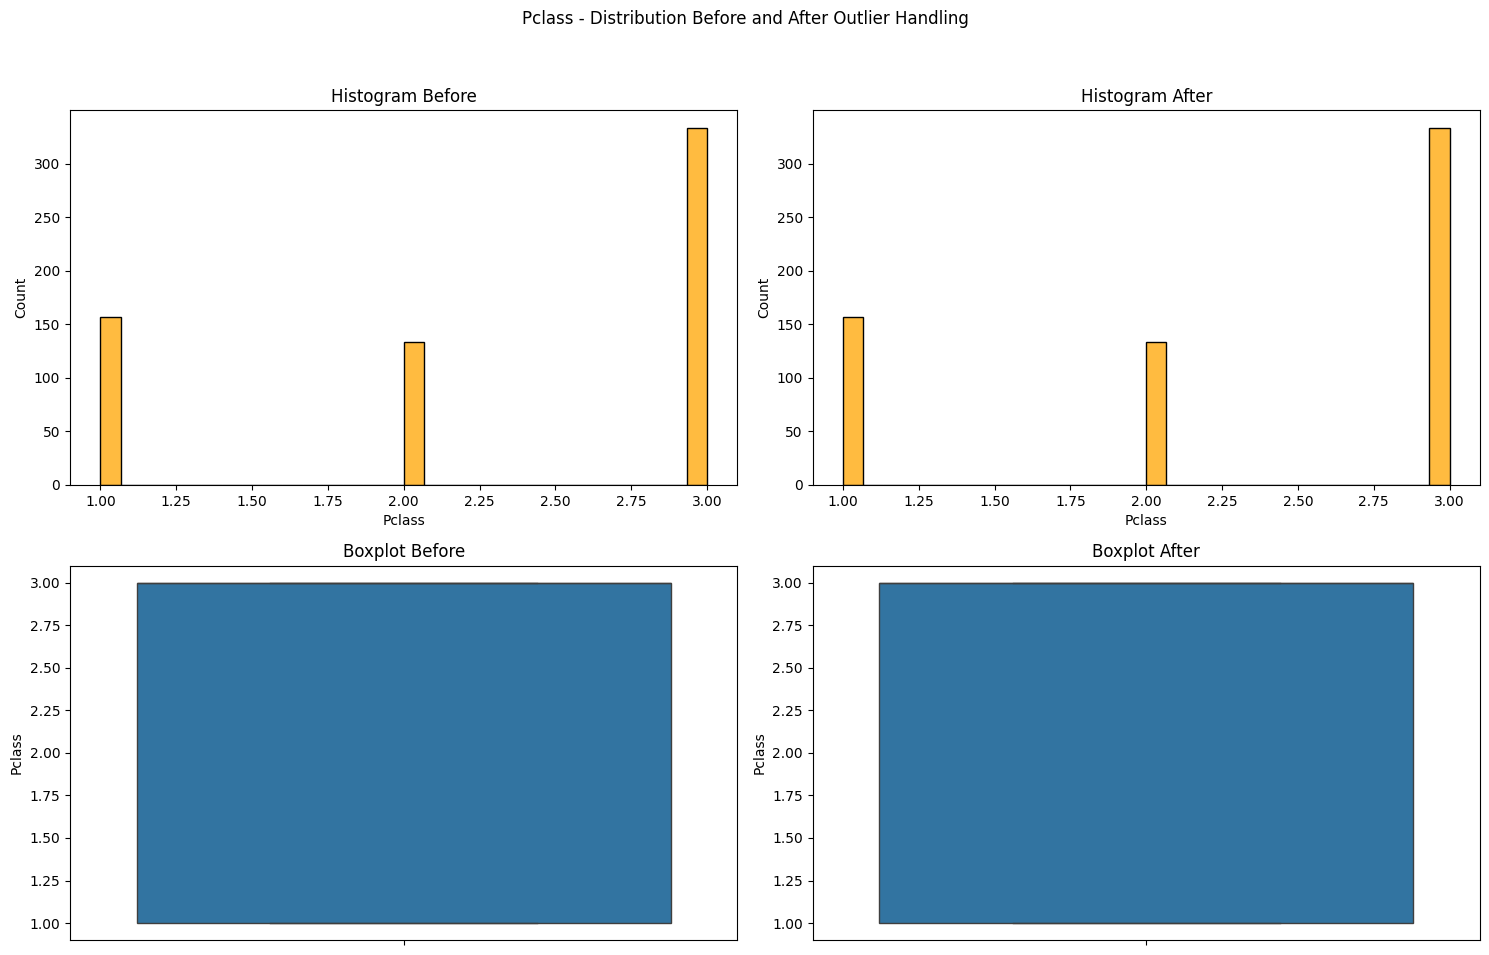

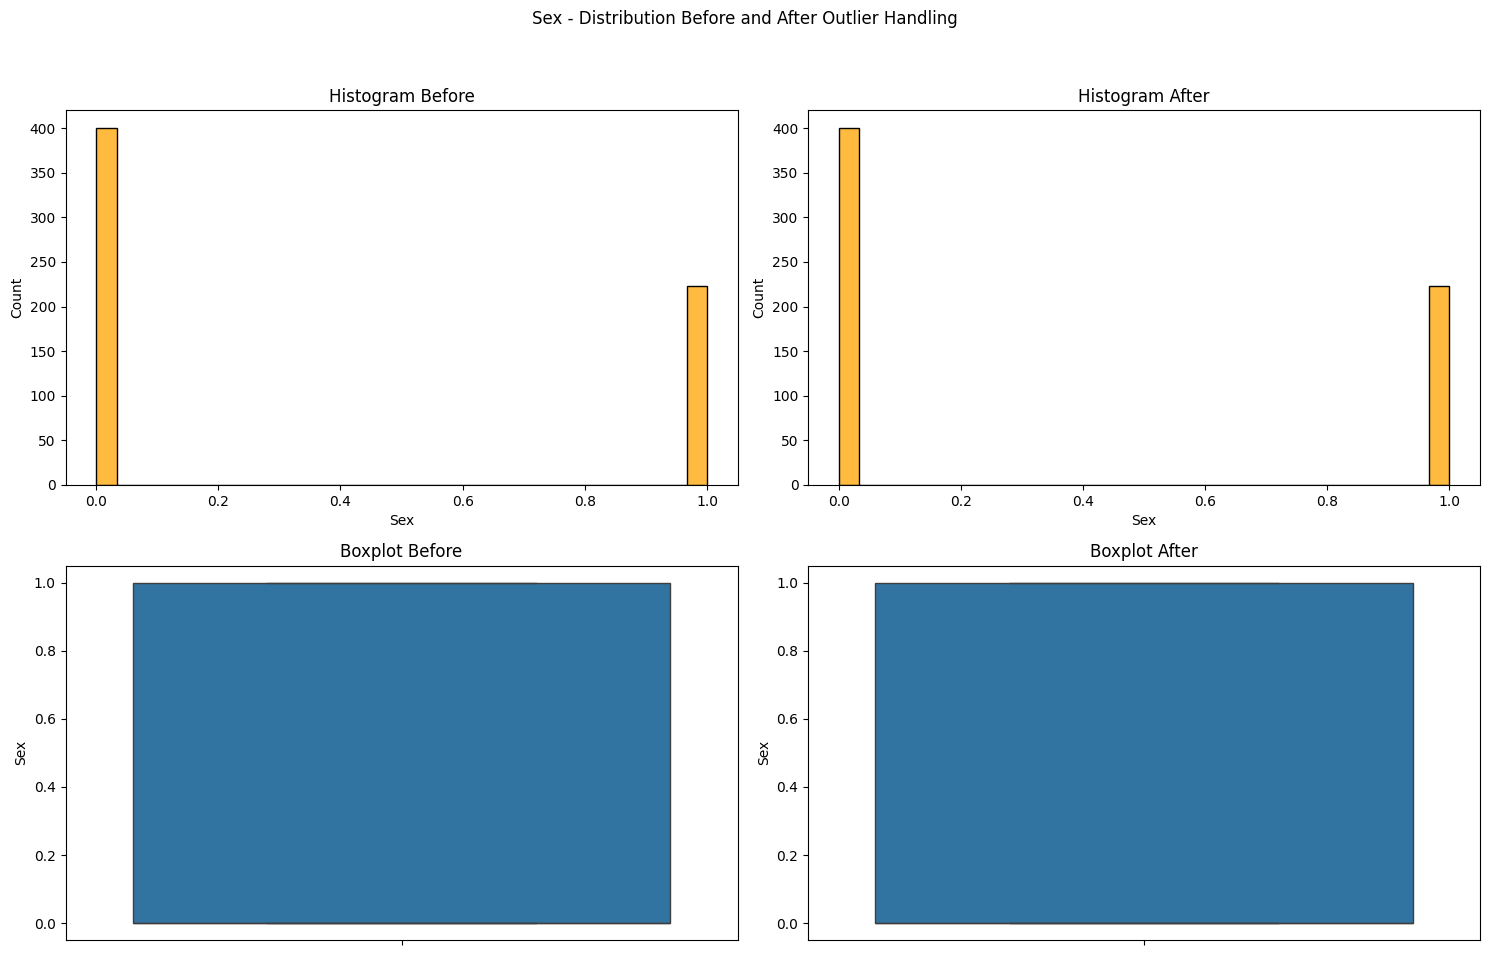

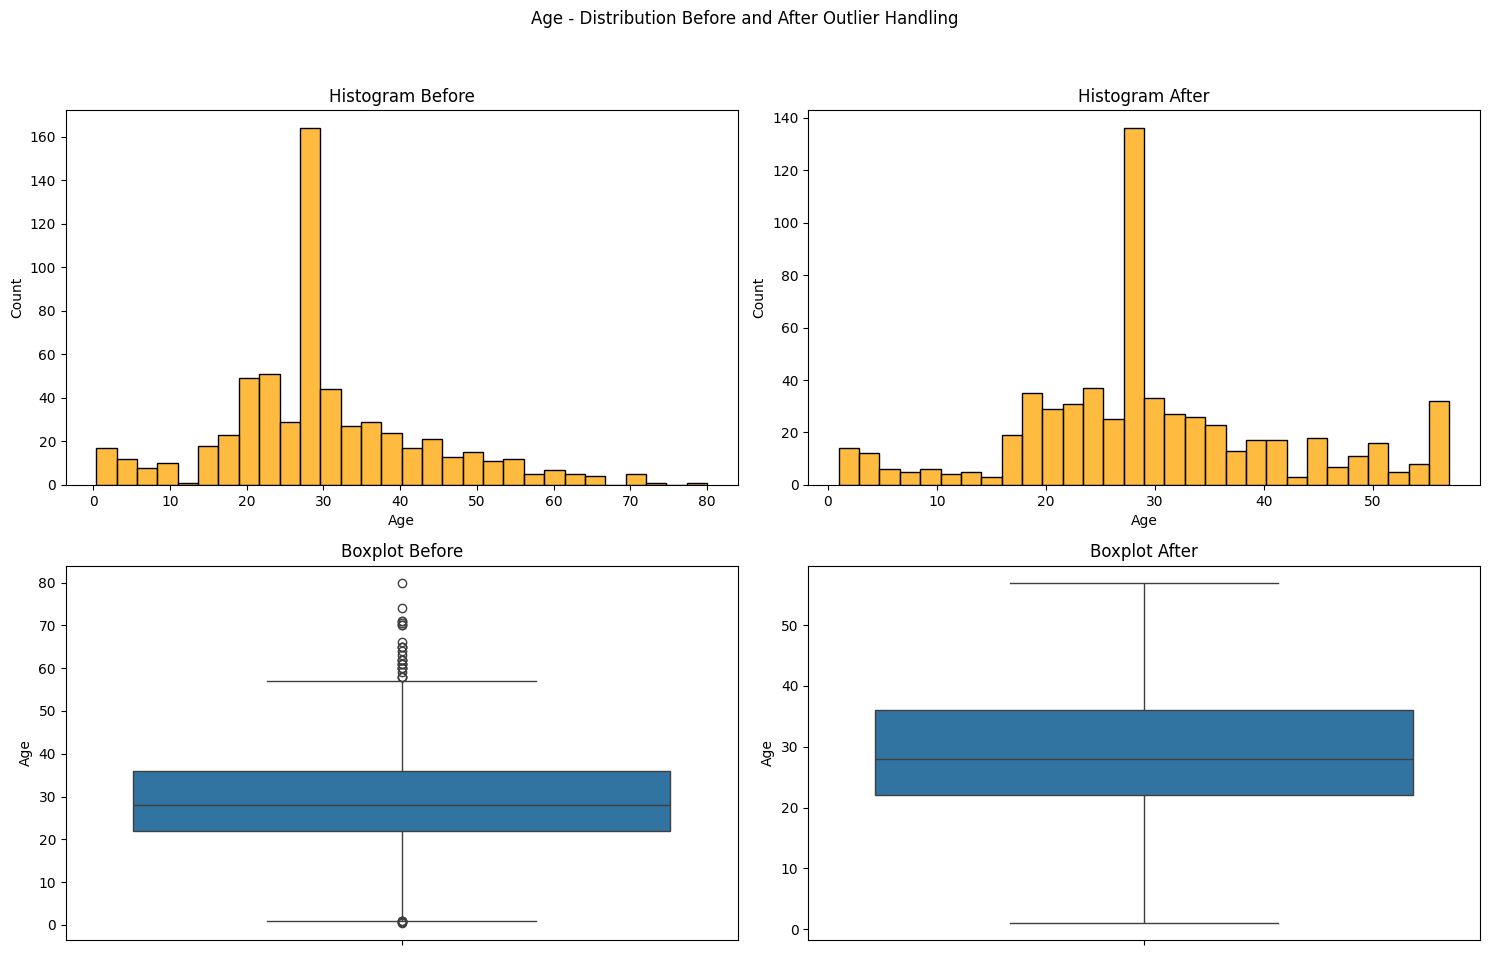

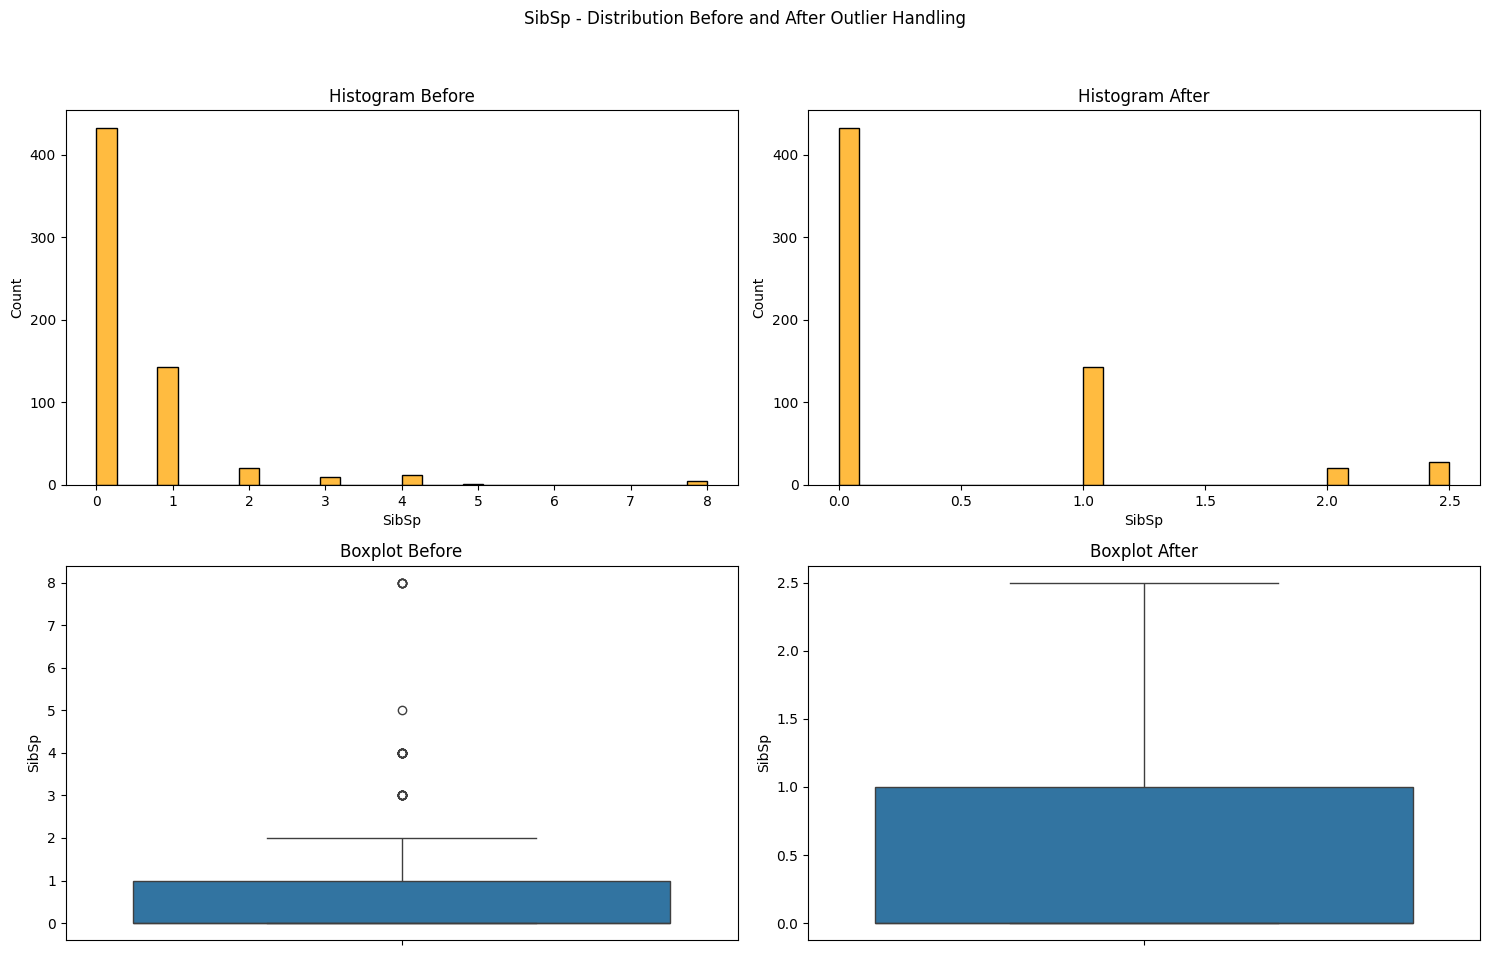

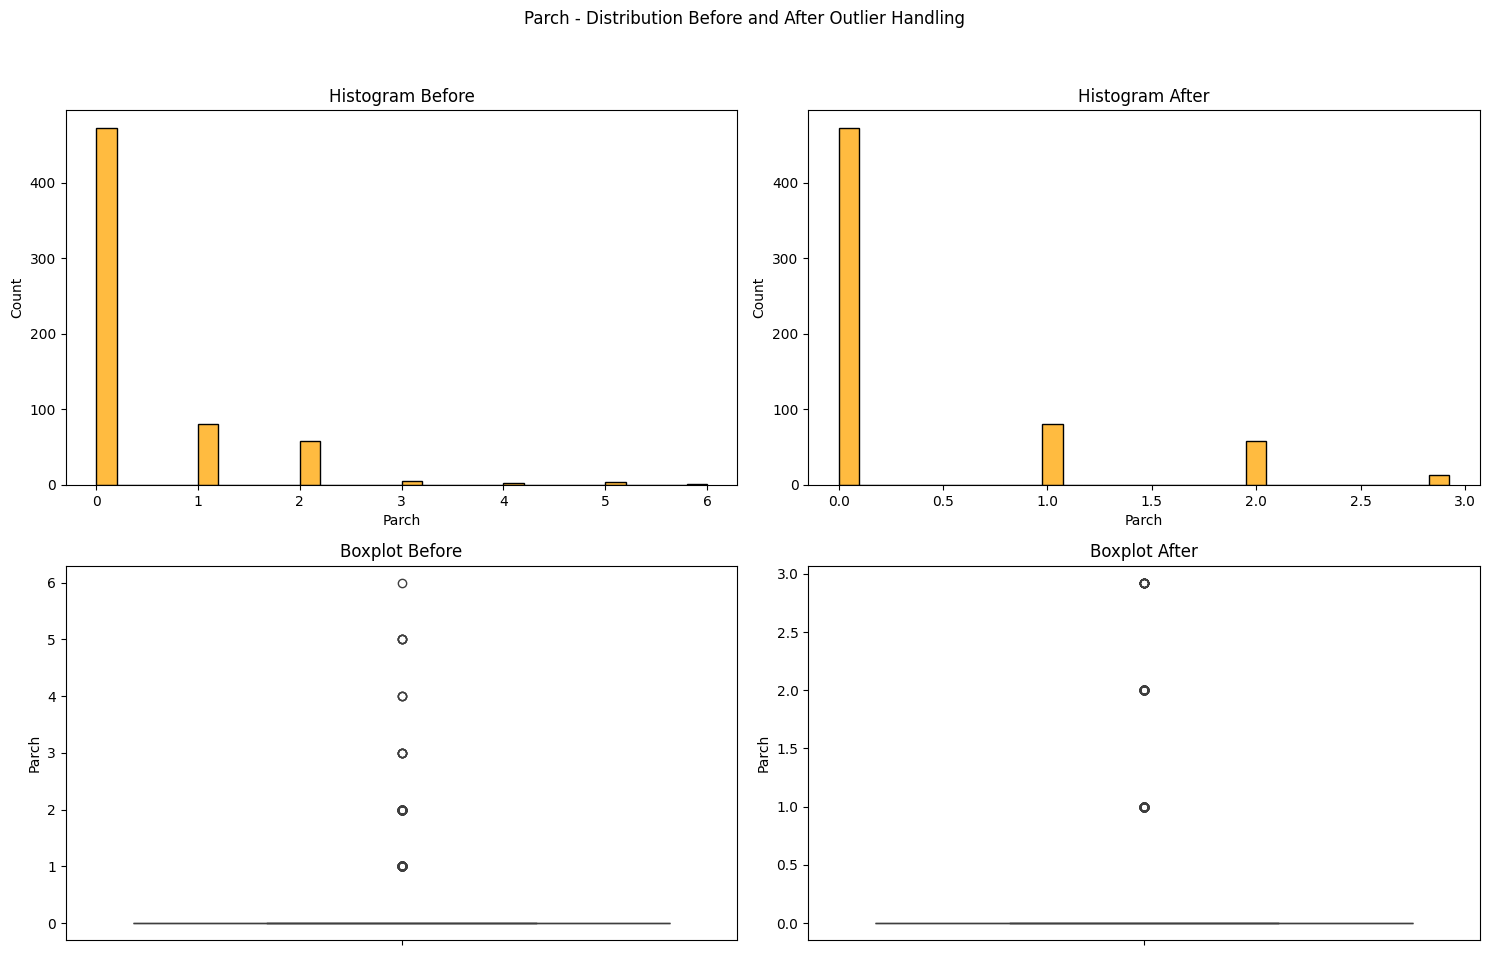

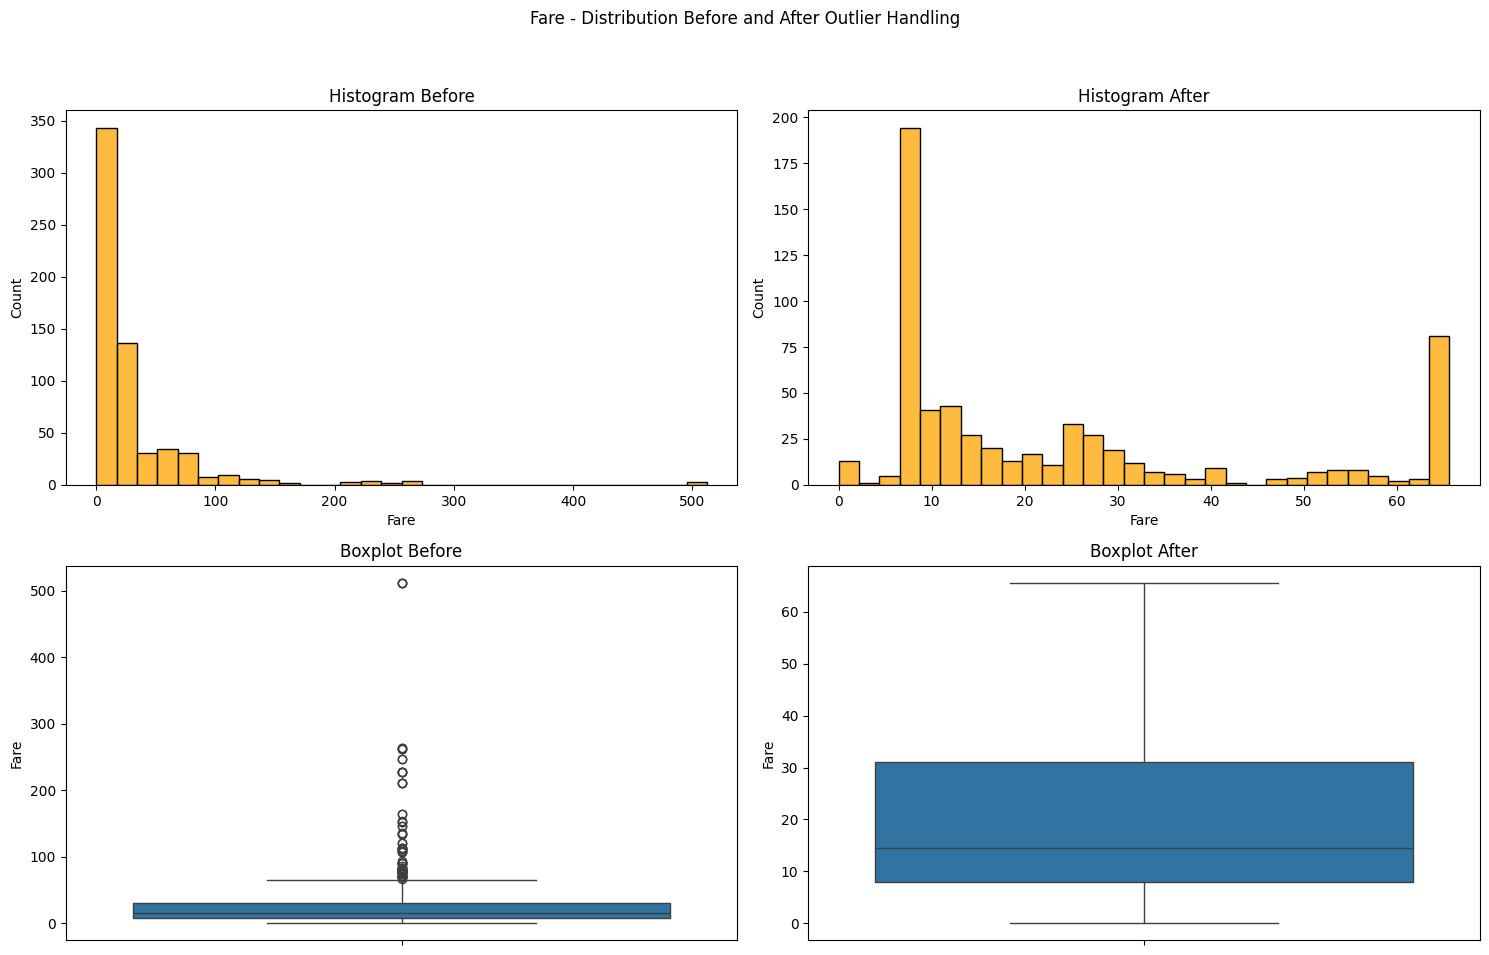

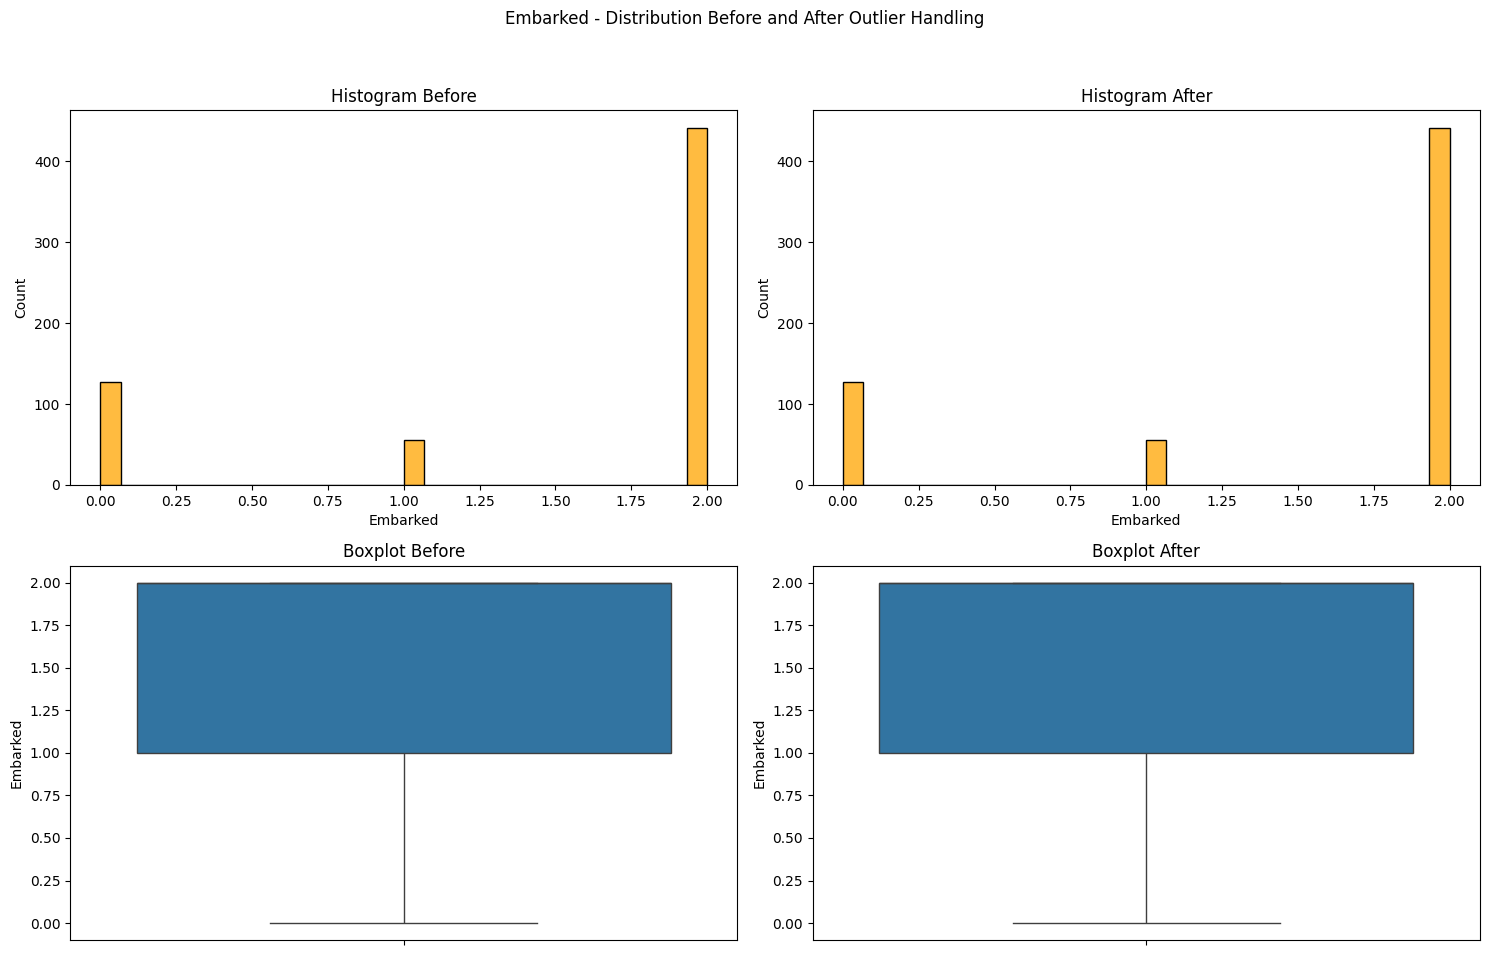

In [311]:
# looping utk menampilkan visualisasi berdasarkan fungsi yg kita buat
for num in num_columns:
    outlier_handling_plot_comparison(X_train, X_train_capped, num)

In [312]:
# cek data X_train
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
597,3,0,49.0,0,0,0.0000,2
476,2,0,34.0,1,0,21.0000,2
102,1,0,21.0,0,1,77.2875,2
361,2,0,29.0,1,0,27.7208,0
230,1,1,35.0,1,0,83.4750,2


berhubung data tidak terdistribusi normal, maka kita gunakan metode scalling MinMaxScaler

## Scalling

In [313]:
# feature Scaling menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_capped)
X_test_scaled = scaler.transform(X_test_capped)

X_train_scaled

array([[1.        , 0.        , 0.85714286, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.58928571, ..., 0.        , 0.31984745,
        1.        ],
       [0.        , 0.        , 0.35714286, ..., 0.34186938, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.5       , ..., 0.68373877, 0.2322062 ,
        0.        ],
       [1.        , 0.        , 0.375     , ..., 0.        , 0.11042352,
        1.        ],
       [1.        , 0.        , 0.35714286, ..., 0.        , 0.13193707,
        1.        ]])

In [314]:
# cek bentuk data X_train
X_train.shape

(623, 7)

In [315]:
# cek bentuk data X_test
X_test.shape

(268, 7)

## Balancing Data

berhubung fitur y (target) imbalance, mari kita lakukan SMOTE/oversampling terlebih dahulu agar machine tidak bias memprediksi data mayoritas

In [316]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=43)

# Melakukan oversampling pada data training
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train)

# Mengecek distribusi setelah oversampling
y_train_oversampled.value_counts()


,count
Survived,
0,385
1,385


In [317]:
# from imblearn.over_sampling import RandomOverSampler
# # Inisialisasi oversampling
# oversampler = RandomOverSampler(random_state=42)

# # Melakukan oversampling pada data training
# X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

# # Mengecek distribusi setelah oversampling
# y_train_oversampled.value_counts()


# 5. Model Training and Evaluation

## Logistic Regression

In [318]:
# inisialisasi model regresi logistik
logreg = LogisticRegression(random_state=43)

# melatih model
logreg.fit(X_train_oversampled, y_train_oversampled)

# prediksi data testing
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# evaluasi metrik
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep = classification_report(y_test, y_pred)

# membuat dataframe untuk metrik evaluasi
logreg_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Score': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg]
})

logreg_df

,Metric,Score
0,Accuracy,0.731343
1,Precision,0.648148
2,Recall,0.673077
3,F1-Score,0.660377
4,ROC-AUC,0.789341


| **Metrik**   | **Score** | **Interpretasi**                                           |
|--------------|---------|-------------------------------------------------------------|
| **Accuracy** | 0.73    | model memprediksi dengan benar sebesar 73% dari seluruh data |
| **Precision**| 0.65    | dari semua prediksi `Survived`, 65% benar-benar selamat       |
| **Recall**   | 0.66    | model mendeteksi 66% dari seluruh penumpang yang benar-benar selamat |
| **F1-Score** | 0.66    | keseimbangan antara precision dan recall berada di 66%      |
| **ROC-AUC**  | 0.79    | model memiliki kemampuan 79% dalam membedakan kelas selamat dan tidak selamat |

---

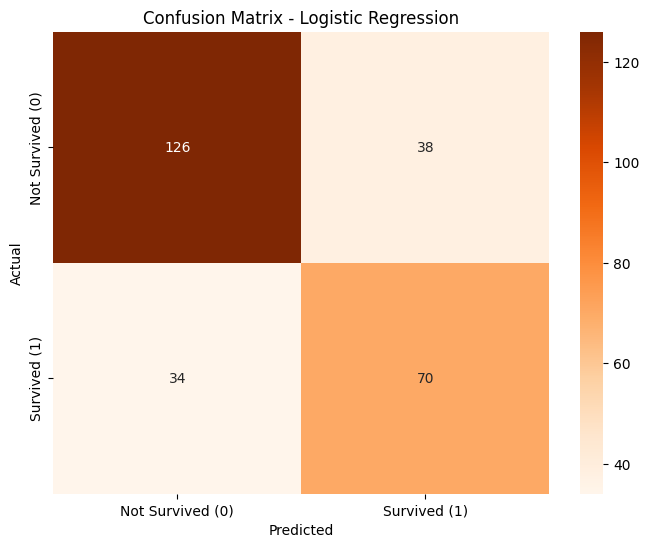

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       164
           1       0.65      0.67      0.66       104

    accuracy                           0.73       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268


Detail:
True Negative (TN): 126
False Positive (FP): 38
False Negative (FN): 34
True Positive (TP): 70


In [319]:
# visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Survived (0)', 'Survived (1)'], yticklabels=['Not Survived (0)', 'Survived (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# showing report
print(classification_report(y_test, y_pred_logreg))

# hasil confusion matrix
tn, fp, fn, tp = conf_matrix_logreg.ravel()
print("\nDetail:")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")


### 🔍 **Analisis Model Regresi Logistik**

| **Kelas Aktual / Prediksi** | **Predicted 0 (Tidak Selamat)** | **Predicted 1 (Selamat)** | **Penjelasan**                                         |
|-----------------------------|-------------------------------|---------------------------|---------------------------------------------------------|
| **Actual 0 (Tidak Selamat)** | **TN (True Negative)**         | **FP (False Positive)**   | TN: Model benar memprediksi penumpang tidak selamat.    |
| **Actual 1 (Selamat)**       | **FN (False Negative)**        | **TP (True Positive)**    | TP: Model benar memprediksi penumpang yang selamat.     |

---

## 📝 **Rincian**

| **Komponen** | **Definisi**                                           | **Interpretasi**                                                      |
|--------------|---------------------------------------------------------|------------------------------------------------------------------------|
| **True Negative (TN)** | penumpang yang **tidak selamat** dan diprediksi **tidak selamat** | model membuat prediksi benar untuk penumpang yang tidak selamat        |
| **False Positive (FP)** | penumpang yang **tidak selamat** tetapi diprediksi **selamat** | model salah memprediksi penumpang yang sebenarnya tidak selamat         |
| **False Negative (FN)** | penumpang yang **selamat** tetapi diprediksi **tidak selamat** | model gagal mendeteksi penumpang yang sebenarnya selamat.                |
| **True Positive (TP)** | penumpang yang **selamat** dan diprediksi **selamat**           | model membuat prediksi benar untuk penumpang yang selamat                |

---

## ⚖️ **Interpretasi:**

1. **True Positive (TP) Tinggi:** model dapat mengidentifikasi penumpang yang benar-benar selamat dengan baik  
2. **False Negative (FN) Masih Ada:** beberapa penumpang yang selamat diprediksi tidak selamat, artinya model masih miss dlm prediksi sebagian penumpang selamat  
3. **False Positive (FP):** ada beberapa penumpang yang diprediksi selamat padahal tidak, meskipun jumlahnya relatif kecil  

---  


*dikarnakan model logreg masih kurang memuaskan, mari kita coba model lain yaitu Random Forest*


## Random Forest

In [320]:
# inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=43)

# melatih model pada data oversampled
rf_model.fit(X_train_oversampled, y_train_oversampled)

# prediksi pada data testing
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# evaluasi Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred)

rf_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Score': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
})

rf_df


,Metric,Score
0,Accuracy,0.809701
1,Precision,0.778947
2,Recall,0.711538
3,F1-Score,0.743719
4,ROC-AUC,0.828565


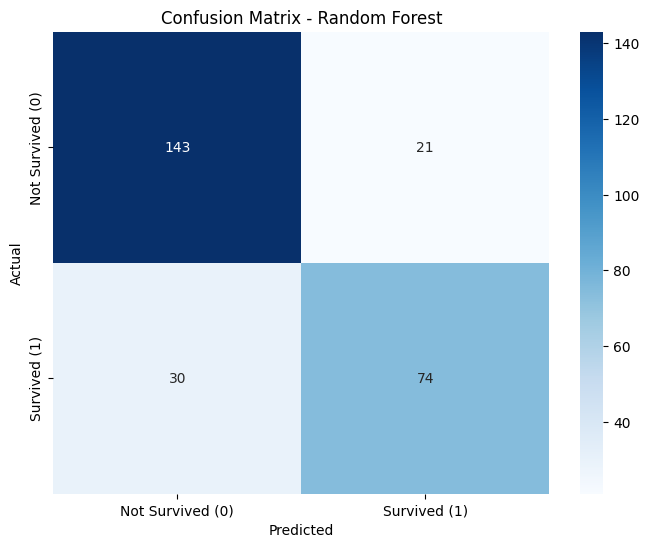

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       164
           1       0.78      0.71      0.74       104

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268


Detail:
True Negative (TN): 143
False Positive (FP): 21
False Negative (FN): 30
True Positive (TP): 74


In [321]:
# visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived (0)', 'Survived (1)'], yticklabels=['Not Survived (0)', 'Survived (1)'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# showing report
print(classification_report(y_test, y_pred_rf))

# hasil confusion matrix
tn, fp, fn, tp = conf_matrix_rf.ravel()
print("\nDetail:")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")


### 🔍 **Analisis Model Random Forest**

Berikut adalah interpretasi hasil Confusion Matrix untuk model Random Forest:

| **Kelas Aktual / Prediksi** | **Predicted 0 (Tidak Selamat)** | **Predicted 1 (Selamat)** | **Penjelasan**                                         |
|-----------------------------|-------------------------------|---------------------------|---------------------------------------------------------|
| **Actual 0 (Tidak Selamat)** | **TN (True Negative)**         | **FP (False Positive)**   | TN: Model benar memprediksi penumpang tidak selamat.    |
| **Actual 1 (Selamat)**       | **FN (False Negative)**        | **TP (True Positive)**    | TP: Model benar memprediksi penumpang yang selamat.     |

---

## 📝 **Rincian:**

| **Komponen** | **Definisi**                                           | **Interpretasi**                                                      |
|--------------|---------------------------------------------------------|------------------------------------------------------------------------|
| **True Negative (TN)** | Penumpang yang **tidak selamat** dan diprediksi **tidak selamat**. | Model membuat prediksi benar untuk penumpang yang tidak selamat.         |
| **False Positive (FP)** | Penumpang yang **tidak selamat** tetapi diprediksi **selamat**. | Model salah memprediksi penumpang yang sebenarnya tidak selamat.         |
| **False Negative (FN)** | Penumpang yang **selamat** tetapi diprediksi **tidak selamat**. | Model gagal mendeteksi penumpang yang sebenarnya selamat.                |
| **True Positive (TP)** | Penumpang yang **selamat** dan diprediksi **selamat**.           | Model membuat prediksi benar untuk penumpang yang selamat.                |

---

## ⚖️ **Interpretasi:**

1. **True Positive (TP) Tinggi:** Model dapat mengidentifikasi penumpang yang benar-benar selamat dengan lebih baik dibandingkan regresi logistik.  
2. **False Negative (FN) Lebih Sedikit:** Random Forest lebih jarang melewatkan penumpang yang sebenarnya selamat dibandingkan LogReg.  
3. **False Positive (FP):** Masih ada beberapa penumpang yang diprediksi selamat padahal tidak, tetapi lebih sedikit dibandingkan LogReg.  

---

## 🚀 **Kesimpulan:**
1. Model Random Forest memiliki **Recall** yang lebih baik dibandingkan Regresi Logistik, menunjukkan bahwa model ini lebih efektif dalam mendeteksi penumpang selamat.  
2. **Precision** yang lebih tinggi juga menandakan bahwa prediksi "selamat" lebih akurat, dengan lebih sedikit False Positive.  


| **Metrik**   | **Skor** | **Interpretasi**                                           |
|--------------|---------|-------------------------------------------------------------|
| **Accuracy** | 0.81    | model memprediksi dengan benar sebesar 81% dari seluruh data |
| **Precision**| 0.78    | dari semua prediksi `Survived`, 78% benar-benar selamat       |
| **Recall**   | 0.70    | model mendeteksi 70% dari seluruh penumpang yang benar-benar selamat |
| **F1-Score** | 0.74    | keseimbangan antara precision dan recall berada di 74%      |
| **ROC-AUC**  | 0.83    | model memiliki kemampuan 83% dalam membedakan kelas selamat dan tidak selamat |

---